# GRIP : THE SPARK FOUNDATION

###Data Science & Business Analytics Intern January 2023 Batch(#GRIPJan2023)

#Name: RESHINA.E.N

##Task5:Exploratory Data Analysis - Sports

Problem statement:As a sports analysts, find out the most successful teams, players and factors
contributing win or loss of a team.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns

import statsmodels.api as sm
from scipy import stats


from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#Display propertice
pd.set_option('max_columns', 135)
pd.set_option('max_rows',135)

# Loading 1st Dataset

In [2]:

#read the csv file into a dataframe
df_matches = pd.read_csv(r"C:\Users\binu-\OneDrive\Desktop\Spark Foundation January2023\matches.csv")
df_deliveries = pd.read_csv(r"C:\Users\binu-\OneDrive\Desktop\Spark Foundation January2023\deliveries.csv")
df_matches.head()
#df2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
print(df_matches.shape)
print(df_deliveries.shape)

(756, 18)
(179078, 21)


In [5]:
df_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [6]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
#checking null values
df_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [8]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [9]:
df_deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [10]:
df_matches.rename(columns = {'id':'match_id'},inplace = True)

In [11]:
df_deliveries.rename(columns = {'match_id':'match_id'},inplace = True)

In [12]:
df_matches.dtypes

match_id            int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [13]:
df_deliveries.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

Now merging of two data sets

In [14]:
data = pd.merge(df_matches,df_deliveries,on = "match_id", how = 'left')

In [15]:
data.head()

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   season            179078 non-null  int64 
 2   city              177378 non-null  object
 3   date              179078 non-null  object
 4   team1             179078 non-null  object
 5   team2             179078 non-null  object
 6   toss_winner       179078 non-null  object
 7   toss_decision     179078 non-null  object
 8   result            179078 non-null  object
 9   dl_applied        179078 non-null  int64 
 10  winner            178706 non-null  object
 11  win_by_runs       179078 non-null  int64 
 12  win_by_wickets    179078 non-null  int64 
 13  player_of_match   178706 non-null  object
 14  venue             179078 non-null  object
 15  umpire1           178578 non-null  object
 16  umpire2           178578 non-null  obj

In [17]:
data.describe()

,match_id,season,dl_applied,win_by_runs,win_by_wickets,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,2013.444510,0.017914,13.404036,3.261579,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,3.363947,0.132639,23.261007,3.347033,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,2008.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,2011.000000,0.000000,0.000000,0.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,2013.000000,0.000000,0.000000,3.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2016.000000,0.000000,19.000000,6.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [18]:
data.shape

(179078, 38)

# Visualisation

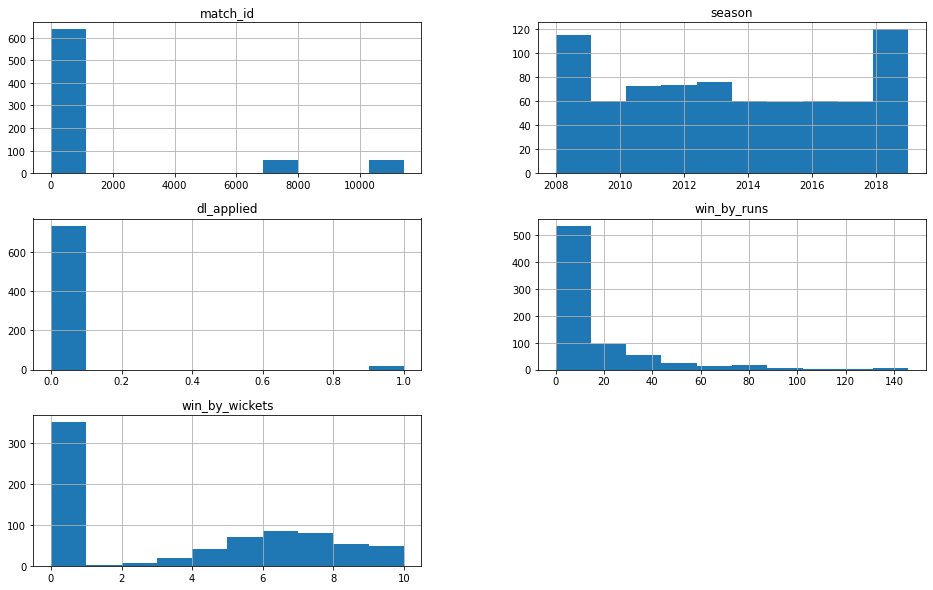

In [19]:
df_matches.hist(figsize = (16,10))
plt.show()

Text(0.5, 1.0, 'Number of Matches played each season')

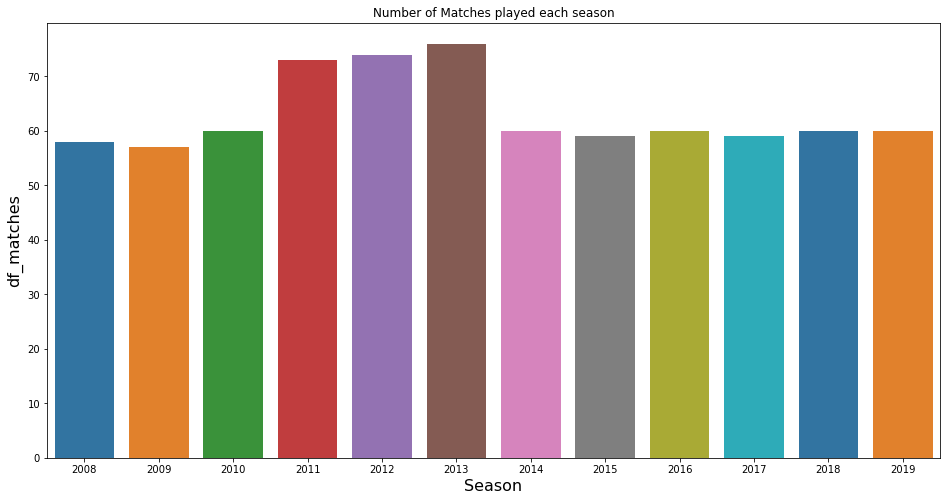

In [20]:
plt.figure(figsize = (16,8))
sns.countplot('season',data = df_matches,palette = 'tab10')
plt.xlabel('Season',fontsize = 16)
plt.ylabel('df_matches',fontsize = 16)
plt.title("Number of Matches played each season")

IN the above figure year 2011,2012,2013 shows maximum number of matches has been played.the year 2011 - 2013 maximum matches was around 70.

Text(0.5, 1.0, 'Number of Teams participated each season')

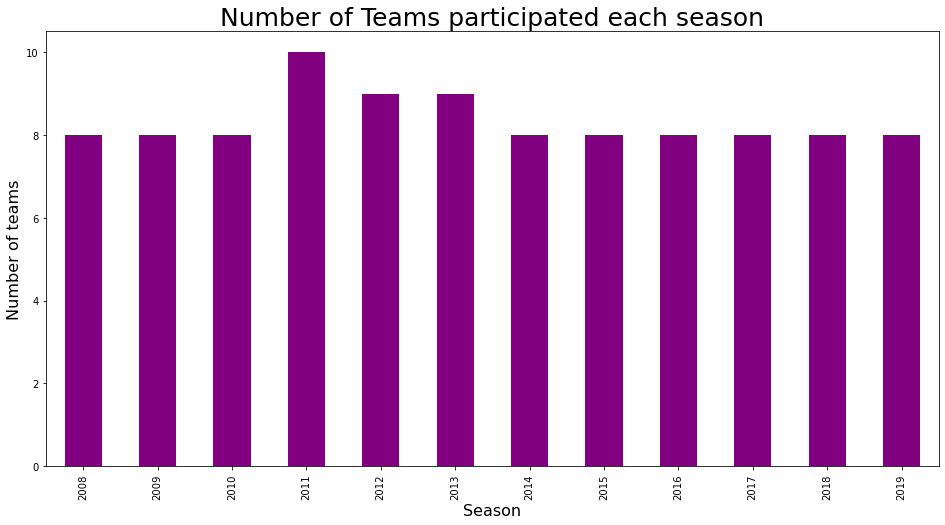

In [21]:
df_matches.groupby('season')['team1'].nunique().plot(kind = 'bar',figsize = (16,8),color = 'purple')
plt.xlabel('Season',fontsize = 16)
plt.ylabel('Number of teams',fontsize = 16)
plt.title("Number of Teams participated each season",fontsize = 25)

In the above figure we can see that in the year 2011 maximum number of teams played.

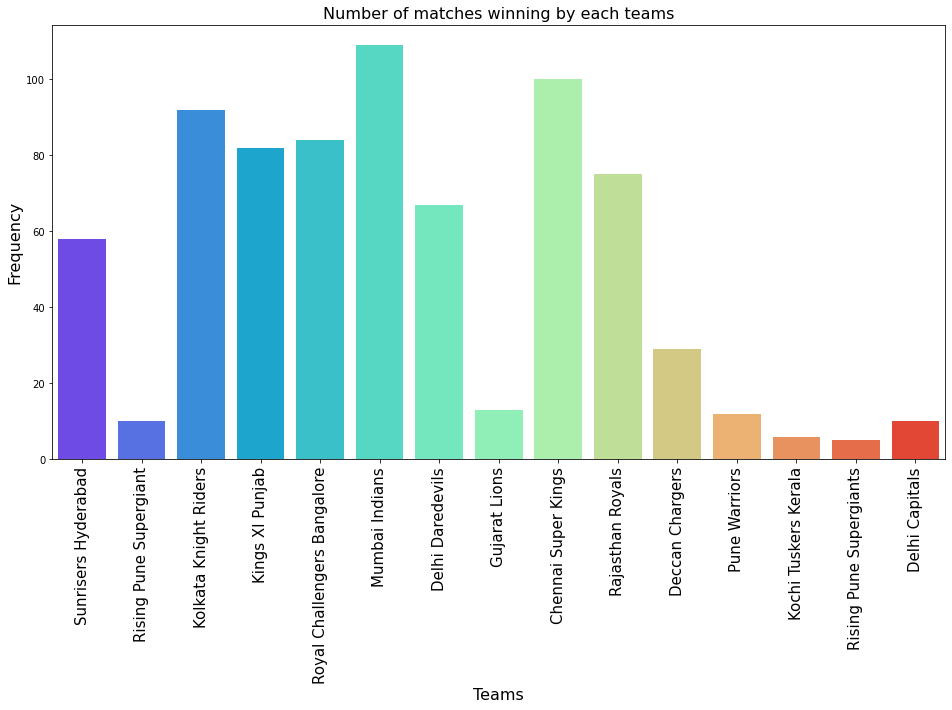

In [22]:
plt.figure(figsize = (16,8))
sns.countplot('winner',data = df_matches,palette = 'rainbow')
plt.xlabel('Teams',fontsize = 16)
plt.ylabel('Frequency',fontsize = 16)
plt.title("Number of matches winning by each teams",fontsize = 16)
plt.xticks(rotation = 90, fontsize = 15)
plt.show()

Mumbai Indians shows highest frequency.

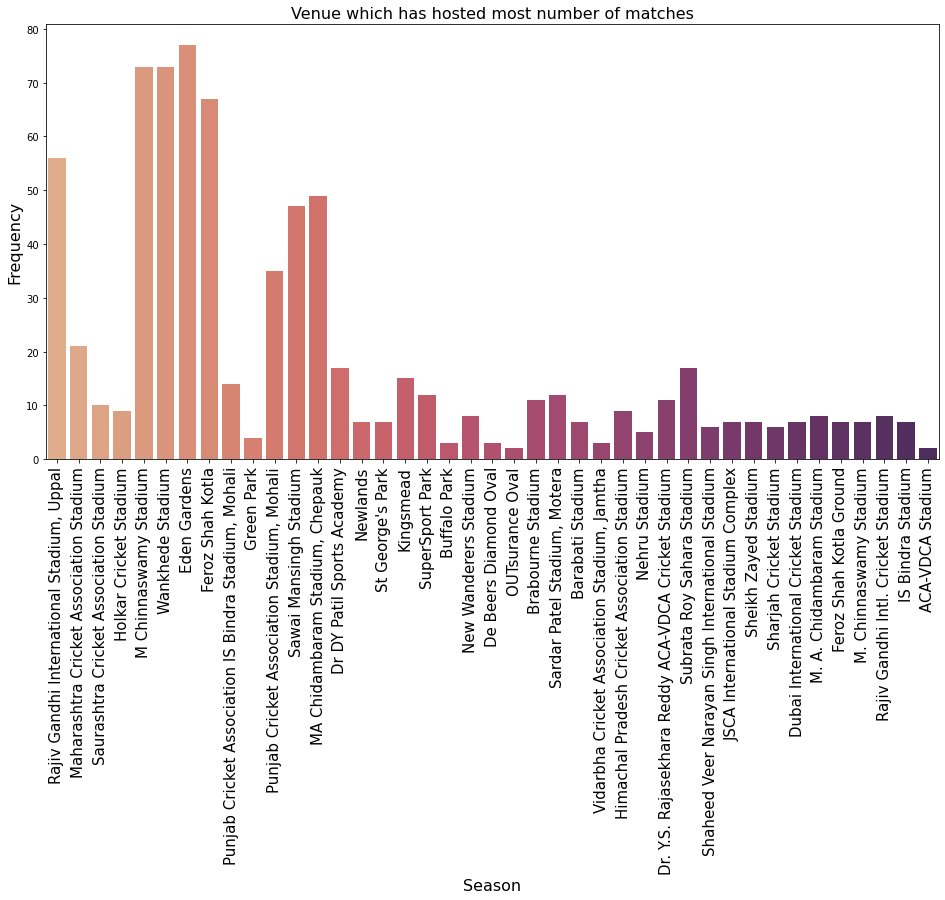

In [23]:
plt.figure(figsize = (16,8))
sns.countplot('venue',data = df_matches,palette = 'flare')
plt.xlabel('Season',fontsize = 16)
plt.ylabel('Frequency',fontsize = 16)
plt.title("Venue which has hosted most number of matches",fontsize = 16)
plt.xticks(rotation = 90, fontsize = 15)
plt.show()

Eden Garden has the highest number of matches.

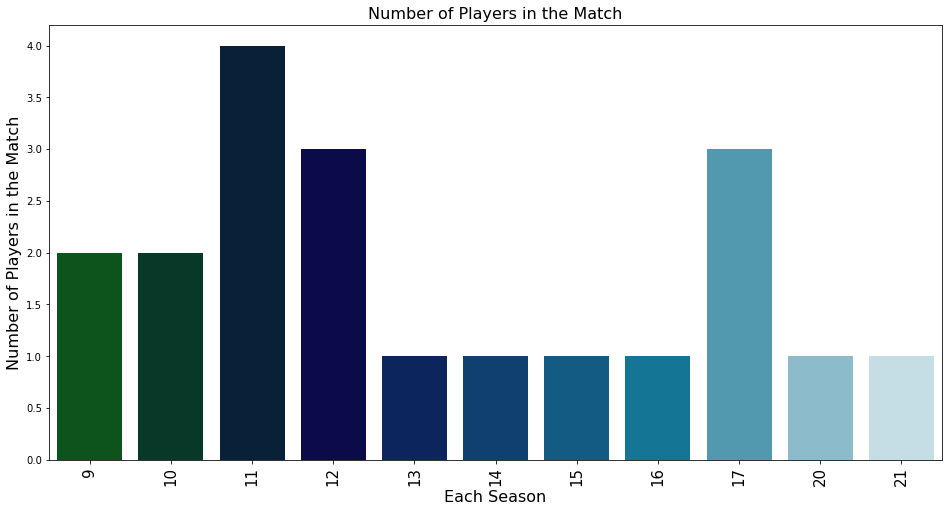

In [24]:
plt.figure(figsize = (16,8))
sns.countplot(df_matches['player_of_match'].value_counts()[:20],data = df_matches,palette = 'ocean')
plt.xlabel('Each Season',fontsize = 16)
plt.ylabel('Number of Players in the Match',fontsize = 16)
plt.title("Number of Players in the Match",fontsize = 16)
plt.xticks(rotation = 90, fontsize = 15)
plt.show()

Most of the players have minimum 10 players,11,12, and 17 has the maximum

Text(0.5, 1.0, 'Decision taken by captains after winning tosses')

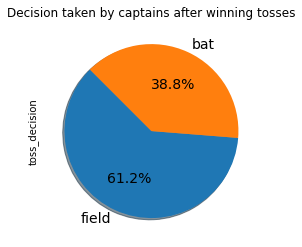

In [25]:
df_matches['toss_decision'].value_counts().plot(kind = 'pie',fontsize = 14,autopct = '%3.1f%%',shadow = True,startangle=135)
plt.title('Decision taken by captains after winning tosses')

The pie diagram shows that maximum captains chooses field instaed of bat after tossing.

In [26]:
df_matches_group = df_matches.groupby('season')['team1','team2'].agg(sum)
print('Team1 vs Team2')
df_matches_group

Team1 vs Team2


,team1,team2
season,,
2008,Kolkata Knight RidersChennai Super KingsRajast...,Royal Challengers BangaloreKings XI PunjabDelh...
2009,Mumbai IndiansRoyal Challengers BangaloreKings...,Chennai Super KingsRajasthan RoyalsDelhi Dared...
2010,Kolkata Knight RidersMumbai IndiansKings XI Pu...,Deccan ChargersRajasthan RoyalsDelhi Daredevil...
2011,Chennai Super KingsDeccan ChargersKochi Tusker...,Kolkata Knight RidersRajasthan RoyalsRoyal Cha...
2012,Chennai Super KingsKolkata Knight RidersPune W...,Mumbai IndiansDelhi DaredevilsMumbai IndiansKi...
2013,Delhi DaredevilsRoyal Challengers BangaloreSun...,Kolkata Knight RidersMumbai IndiansPune Warrio...
2014,Kolkata Knight RidersDelhi DaredevilsChennai S...,Mumbai IndiansRoyal Challengers BangaloreKings...
2015,Mumbai IndiansChennai Super KingsRajasthan Roy...,Kolkata Knight RidersDelhi DaredevilsKings XI ...
2016,Mumbai IndiansDelhi DaredevilsKings XI PunjabR...,Rising Pune SupergiantsKolkata Knight RidersGu...


In [27]:
df_matches_group = df_matches.groupby('winner')['win_by_runs','win_by_wickets'].agg(sum)
print('winner of the teams by runs and wickets')
df_matches_group

winner of the teams by runs and wickets


,win_by_runs,win_by_wickets
winner,,
Chennai Super Kings,1778,289
Deccan Chargers,421,72
Delhi Capitals,92,29
Delhi Daredevils,675,275
Gujarat Lions,1,65
Kings XI Punjab,925,268
Kochi Tuskers Kerala,23,30
Kolkata Knight Riders,1086,351
Mumbai Indians,1866,307


Above results shows that chennai super kings was the maximum winners.

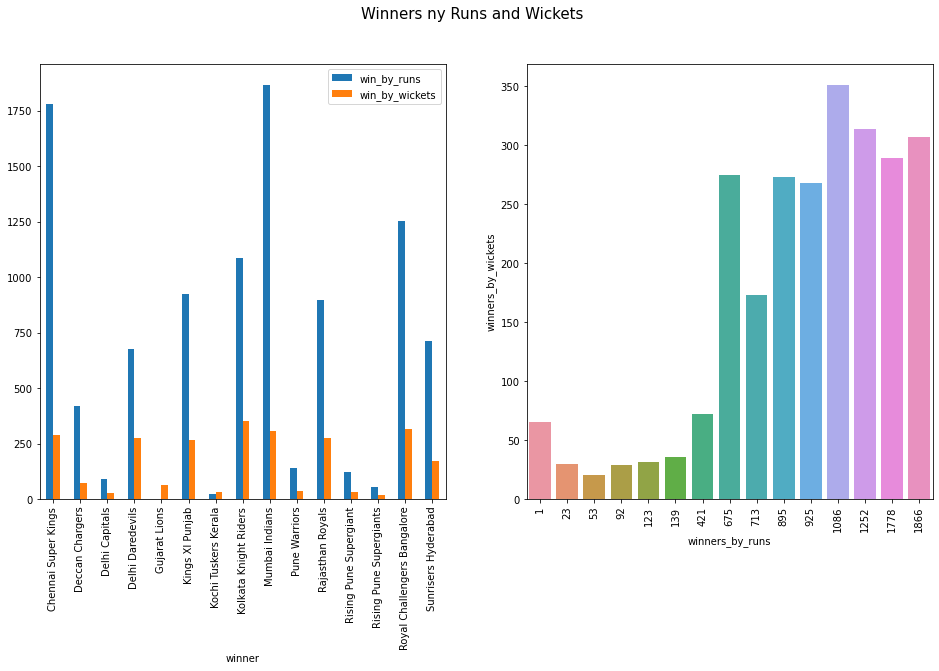

In [28]:
fig,axes = plt.subplots(1,2,figsize = (16,8))
fig.suptitle('Winners ny Runs and Wickets',fontsize =15 )
sns.barplot(data = df_matches_group,x = 'win_by_runs',y='win_by_wickets',ax = axes[1])
df_matches_group.plot(kind = 'bar',ax= axes[0])
plt.xlabel('winners_by_runs',fontsize = 10)
plt.ylabel('winners_by_wickets',fontsize = 10)
plt.xticks(rotation = 90,fontsize = 10)
plt.show()

Run-wise Mumbai Indians is the winners and wicket-wise kolkata Knight Riders.

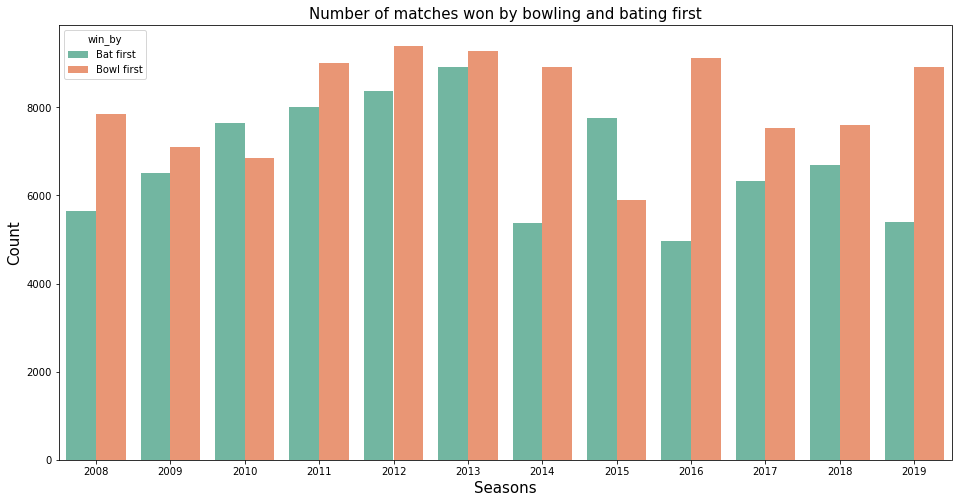

In [29]:
data['win_by']=np.where(data ['win_by_runs']>0,'Bat first','Bowl first')
plt.figure(figsize = (16,8))
sns.countplot('season',hue = 'win_by',data = data,palette = 'Set2')
plt.title('Number of matches won by bowling and bating first',fontsize = 15)
plt.xlabel('Seasons',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()


Here most of them win by Bowling first.

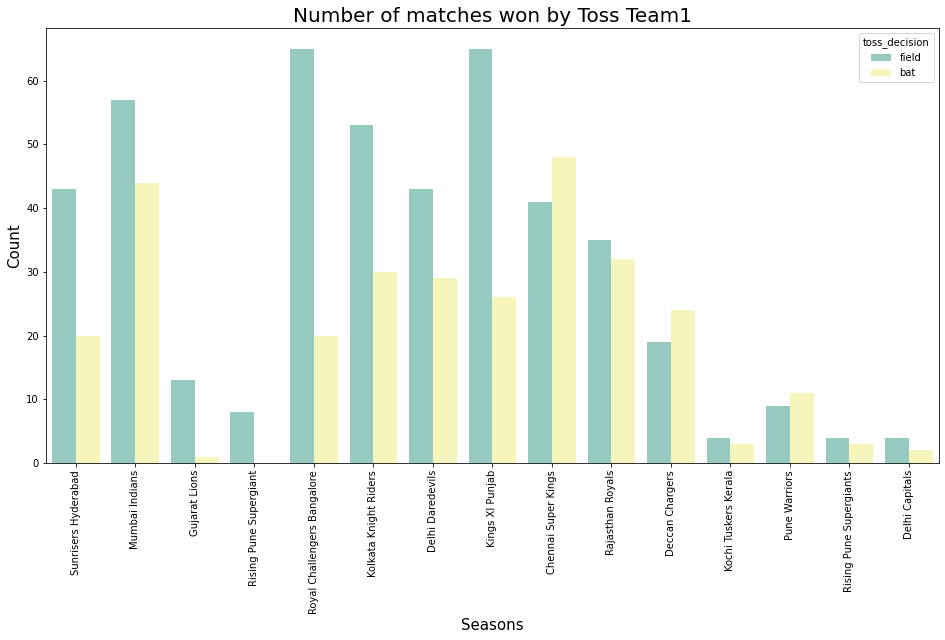

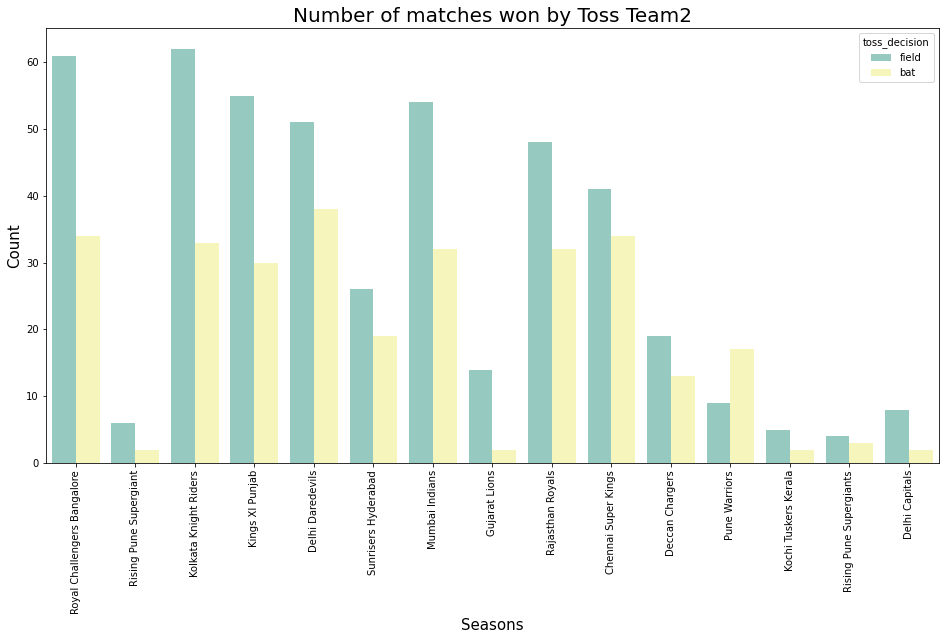

In [30]:
plt.subplots(1,1,figsize = (16,8))
sns.countplot('team1',hue = 'toss_decision',data = df_matches,palette = 'Set3')
plt.title('Number of matches won by Toss Team1',fontsize = 20)
plt.xlabel('Seasons',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.xticks(rotation = 90,fontsize = 10)
plt.show()


plt.subplots(1,1,figsize = (16,8))
sns.countplot('team2',hue = 'toss_decision',data = df_matches,palette = 'Set3')
plt.title('Number of matches won by Toss Team2',fontsize = 20)
plt.xlabel('Seasons',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.xticks(rotation = 90,fontsize = 10)
plt.show()

In both cases winners who choose field by toss win maximum.

In [31]:
df_matches = df_matches.drop_duplicates(subset=['season'],keep = 'last')
df_matches[['season','winner']].reset_index(drop = True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


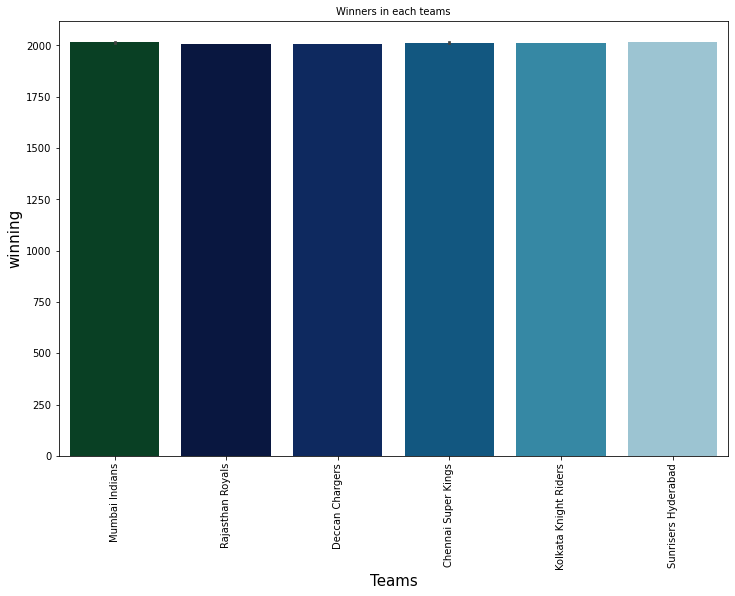

In [32]:
plt.figure(figsize = (12,8))
sns.barplot(x = df_matches['winner'],y =df_matches['season'],palette = 'ocean')
plt.title('Winners in each teams',fontsize = 10)
plt.xlabel('Teams',fontsize = 15)
plt.ylabel('winning',fontsize = 15)
plt.xticks(rotation = 90,fontsize = 10)
plt.show()

Text(0, 0.5, 'winning')

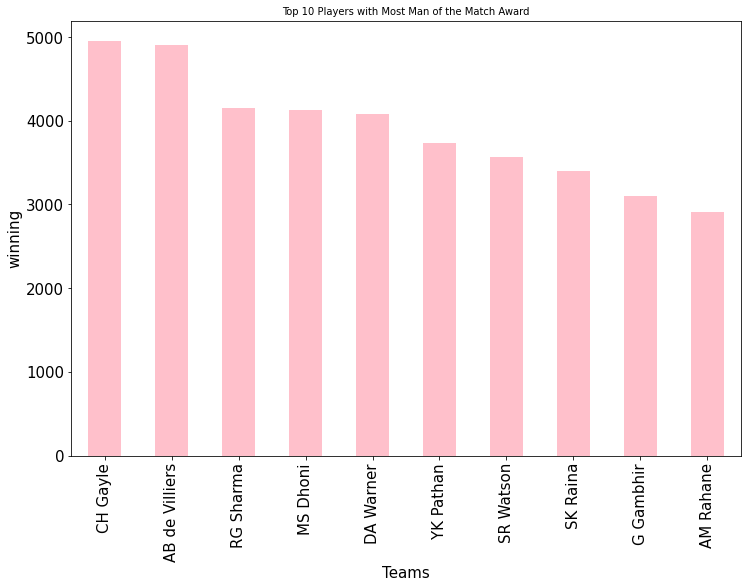

In [33]:
Man_of_the_match = data['player_of_match'].value_counts()
Man_of_the_match.head(10).plot(kind = 'bar',figsize = (12,8),fontsize = 15,color = 'pink')
plt.title('Top 10 Players with Most Man of the Match Award',fontsize = 10)
plt.xlabel('Teams',fontsize = 15)
plt.ylabel('winning',fontsize = 15)


C H Gayle and AB de Villiers are the most Man of the match Award winners.

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

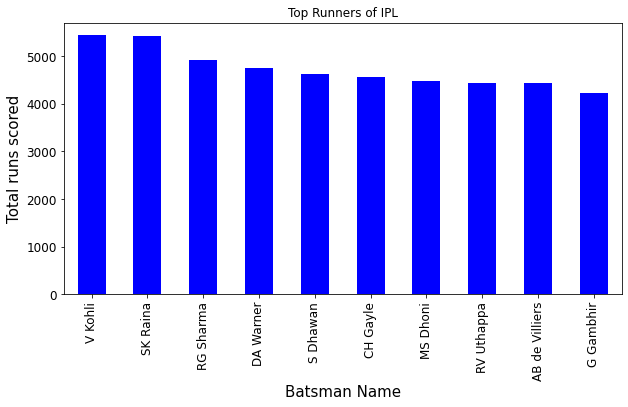

In [34]:
data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar',color = 'Blue',figsize = (10,5))
plt.title('Top Runners of IPL')
plt.xlabel('Batsman Name',fontsize = 15)
plt.ylabel('Total runs scored',fontsize = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)

V Kohli and SK Raina are the two top runners.

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

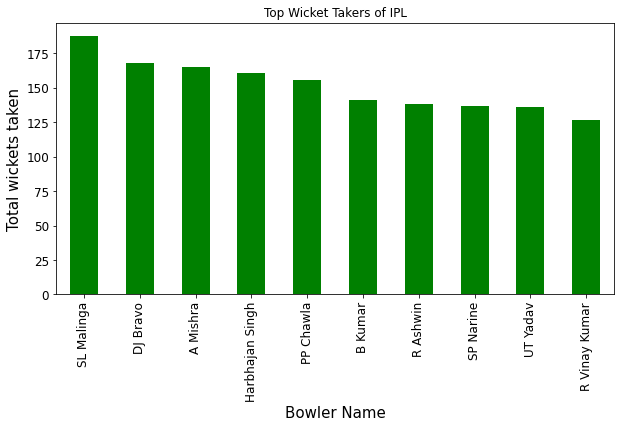

In [35]:
data.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = 'bar',color = 'green',figsize = (10,5))
plt.title('Top Wicket Takers of IPL')
plt.xlabel('Bowler Name',fontsize = 15)
plt.ylabel('Total wickets taken',fontsize = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)

SL Malinga is the top wicket taker

(array([15000., 16000., 17000., 18000., 19000., 20000., 21000., 22000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

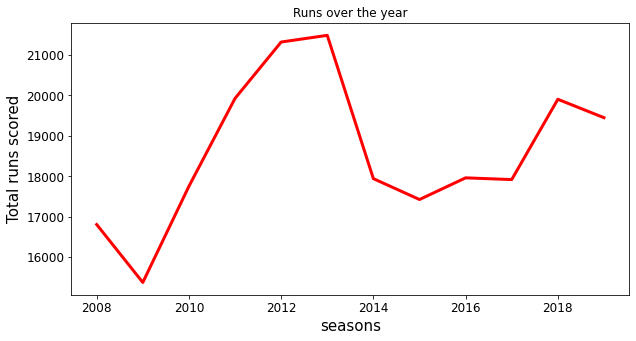

In [36]:
data.groupby('season')['batsman_runs'].sum().plot(kind = 'line',linewidth = 3,color = 'red',figsize = (10,5))
plt.title('Runs over the year')
plt.xlabel('seasons',fontsize = 15)
plt.ylabel('Total runs scored',fontsize = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)

Maximum runs scored is in the year 2013.